In [19]:
!pip install keras
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
import numpy as np
import pandas as pd
import os
import random

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

import tensorflow

from keras.preprocessing.image import ImageDataGenerator

%matplotlib inline



In [22]:
TrainingImagePath = '/content/drive/MyDrive/dataset/train'
TestingImagePath = '/content/drive/MyDrive/dataset/test'
ValidationImagePath = '/content/drive/MyDrive/dataset/validation'



In [23]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

In [24]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [25]:
training_set = train_datagen.flow_from_directory(
    TrainingImagePath,
    target_size=(128,128),
    batch_size=32,
    class_mode='categorical'
)

Found 202 images belonging to 5 classes.


In [26]:
# Function to plot any random image from dataset
def showImages(class_name):
    random_index = random.choice(list(range(1, 49)))
    folder_path=os.path.join(TrainingImagePath, class_name)
    try:
        image_path=os.path.join(folder_path,str(random_index).zfill(3)+".jpg")
        plt.imshow(mpimg.imread(image_path))
    except:
        image_path=os.path.join(folder_path,str(random_index).zfill(2)+".jpg")
        plt.imshow(mpimg.imread(image_path))
    plt.title(class_name)
    plt.axis(False)

In [27]:
test_set = test_datagen.flow_from_directory(
    TestingImagePath,
    target_size=(128,128),
    batch_size=32,
    class_mode='categorical'
)

Found 11 images belonging to 5 classes.


In [28]:
# Generating the valid Data
valid_set = test_datagen.flow_from_directory(
        ValidationImagePath,
        target_size=(128, 128),
        batch_size=32,
        class_mode='categorical')

Found 5 images belonging to 5 classes.


In [29]:
# Printing class labels for each face
test_set.class_indices

{'chael_sonnen': 0,
 'conor_mcgregor': 1,
 'daniel_cormier': 2,
 'jon_jones': 3,
 'sean_omalley': 4}

In [30]:
# class_indices have the numeric tag for each balls
TrainClasses=training_set.class_indices

# Storing the face and the numeric tag for future reference
ResultMap={}
for ballValue,ballName in zip(TrainClasses.values(),TrainClasses.keys()):
    ResultMap[ballValue]=ballName

# Saving the face map for future reference
import pickle
with open(R"E:\Data Sets\Balls Classification\ResultsMap.pkl", 'wb') as f:
    pickle.dump(ResultMap, f, pickle.HIGHEST_PROTOCOL)

print("Mapping of Face and its ID",ResultMap)

# The number of neurons for the output layer is equal to the number of faces
OutputNeurons=len(ResultMap)
print('\n The Number of output neurons: ', OutputNeurons)

Mapping of Face and its ID {0: 'chael_sonnen', 1: 'conor_mcgregor', 2: 'daniel_cormier', 3: 'jon_jones', 4: 'sean_omalley'}

 The Number of output neurons:  5


In [31]:
'''######################## Create CNN deep learning model ####################################'''
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense

'''Initializing the Convolutional Neural Network'''
classifier= Sequential()

''' STEP--1 Convolution
# Adding the first layer of CNN
# we are using the format (64,64,3) because we are using TensorFlow backend
# It means 3 matrix of size (64X64) pixels representing Red, Green and Blue components of pixels
'''
classifier.add(Convolution2D(32, kernel_size=(3, 3), strides=(1, 1), input_shape=(128,128,3), activation='relu'))

'''# STEP--2 MAX Pooling'''
classifier.add(MaxPool2D(pool_size=(2,2)))

'''############## ADDITIONAL LAYER of CONVOLUTION for better accuracy #################'''
classifier.add(Convolution2D(64, kernel_size=(3, 3), strides=(1, 1), activation='relu'))

classifier.add(MaxPool2D(pool_size=(2,2)))


'''# STEP--3 FLattening'''
classifier.add(Flatten())

'''# STEP--4 Fully Connected Neural Network'''
classifier.add(Dense(256, activation='relu'))

classifier.add(Dense(OutputNeurons, activation='softmax'))

'''# Compiling the CNN'''
#classifier.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
classifier.compile(loss='categorical_crossentropy', optimizer = 'rmsprop', metrics=["accuracy"])

In [32]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 57600)             0         
                                                                 
 dense_2 (Dense)             (None, 256)              

In [33]:
import time
# Measuring the time taken by the model to train
StartTime=time.time()

# Starting the model training
model_history=classifier.fit_generator(
                                        training_set,
                                        steps_per_epoch=len(training_set),
                                        epochs=20,
                                        validation_data=valid_set,
                                        validation_steps=len(valid_set),
                                        verbose=1)

EndTime=time.time()
print("############### Total Time Taken: ", round((EndTime-StartTime)/60), 'Minutes #############')

<ipython-input-33-18b6e7723b8a>:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_history=classifier.fit_generator(


Epoch 1/20
7/7 [==============================] - 49s 6s/step - loss: 4.9998 - accuracy: 0.2079 - val_loss: 1.6812 - val_accuracy: 0.2000
Epoch 2/20
7/7 [==============================] - 11s 1s/step - loss: 1.5600 - accuracy: 0.3069 - val_loss: 1.6531 - val_accuracy: 0.2000
Epoch 3/20
7/7 [==============================] - 10s 1s/step - loss: 1.5338 - accuracy: 0.3267 - val_loss: 1.6827 - val_accuracy: 0.0000e+00
Epoch 4/20
7/7 [==============================] - 10s 1s/step - loss: 1.5026 - accuracy: 0.3564 - val_loss: 1.6971 - val_accuracy: 0.0000e+00
Epoch 5/20
7/7 [==============================] - 11s 2s/step - loss: 1.5104 - accuracy: 0.4307 - val_loss: 1.7324 - val_accuracy: 0.2000
Epoch 6/20
7/7 [==============================] - 10s 2s/step - loss: 1.3406 - accuracy: 0.4802 - val_loss: 2.0169 - val_accuracy: 0.0000e+00
Epoch 7/20
7/7 [==============================] - 9s 1s/step - loss: 1.3418 - accuracy: 0.5000 - val_loss: 1.6874 - val_accuracy: 0.2000
Epoch 8/20
7/7 [=======

In [34]:
accuracy = model_history.history['accuracy']
val_accuracy  = model_history.history['val_accuracy']

loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

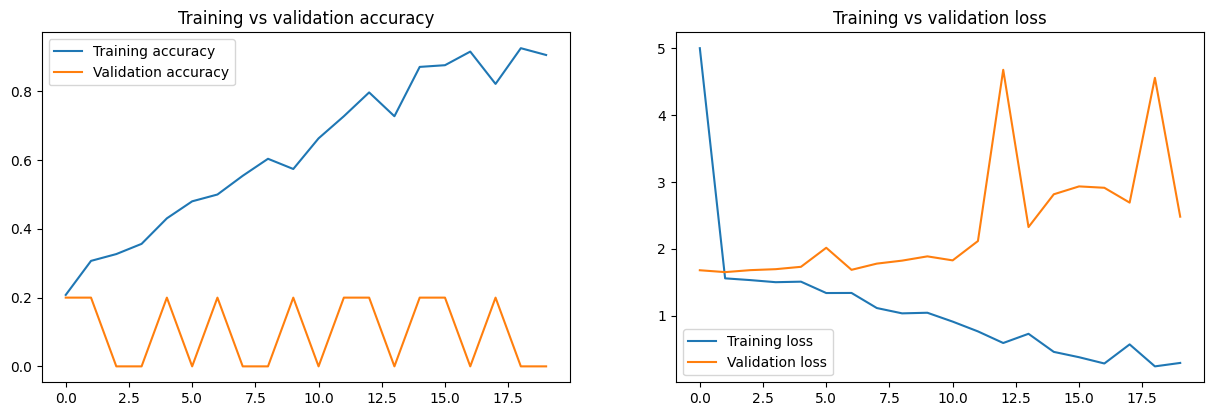

In [35]:
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
plt.plot(accuracy, label = "Training accuracy")
plt.plot(val_accuracy, label="Validation accuracy")
plt.legend()
plt.title("Training vs validation accuracy")


plt.subplot(2,2,2)
plt.plot(loss, label = "Training loss")
plt.plot(val_loss, label="Validation loss")
plt.legend()
plt.title("Training vs validation loss")

plt.show()